<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/42_Day_Z_score_for_normal_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


/tmp/ipython-input-1255527443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-1255527443.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['iq'])


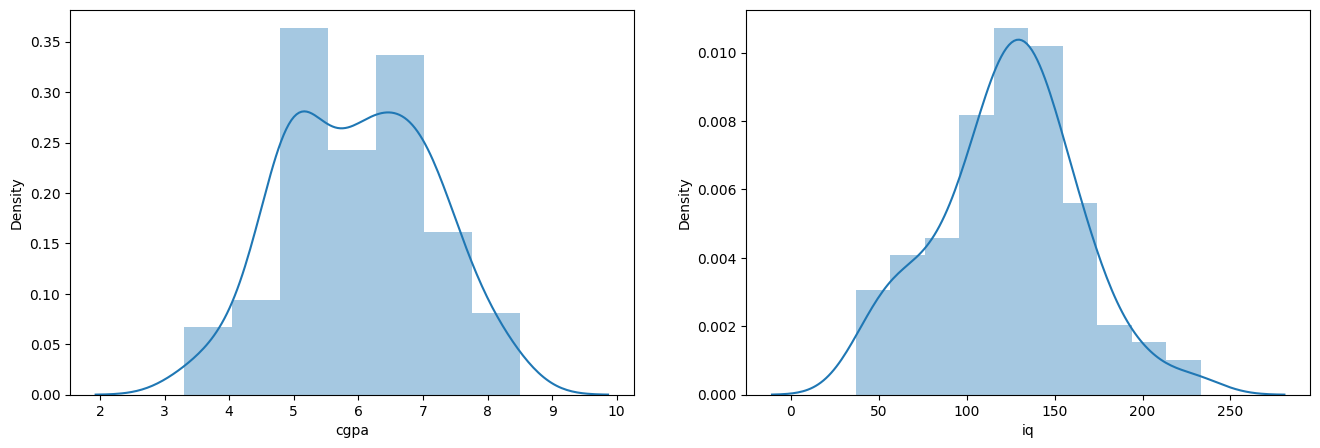

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['iq'])

plt.show()

In [5]:
print(" mean of cgpa =",df['cgpa'].mean())
print(" std of cgpa =",df['cgpa'].std())
print(" min of cgpa =",df['cgpa'].min())
print(" max of cgpa =",df['cgpa'].max())

 mean of cgpa = 5.9910000000000005
 std of cgpa = 1.1436336737775692
 min of cgpa = 3.3
 max of cgpa = 8.5


In [6]:
# find boundary  value

print(" highest allowed =" , df['cgpa'].mean() + 2*df['cgpa'].std())

print(" lowest allowed =" , df['cgpa'].mean() -  2*df['cgpa'].std())

 highest allowed = 8.27826734755514
 lowest allowed = 3.703732652444862


In [7]:
# find outlier
df[(df['cgpa'] > 8.2 ) | (df['cgpa'] < 3.7)]

,Unnamed: 0,cgpa,iq,placement
17,17,3.3,183.0,0
50,50,3.5,233.0,0
53,53,8.3,168.0,1
69,69,8.5,120.0,1


# 1. Trimming method to deal outlier


In [8]:
new_df = df[(df['cgpa'] < 8.2 ) & (df['cgpa'] > 3.7)]

In [9]:
new_df # 4 rows trimmed

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


# Z score method

In [10]:
df['cgps_Z_score']=df['cgpa'] - df['cgpa'].mean() / df['cgpa'].std()

In [11]:
df

,Unnamed: 0,cgpa,iq,placement,cgps_Z_score
0,0,6.8,123.0,1,1.561434
1,1,5.9,106.0,0,0.661434
2,2,5.3,121.0,0,0.061434
3,3,7.4,132.0,1,2.161434
4,4,5.8,142.0,0,0.561434
...,...,...,...,...,...
95,95,4.3,200.0,0,-0.938566
96,96,4.4,42.0,0,-0.838566
97,97,6.7,182.0,1,1.461434
98,98,6.3,103.0,1,1.061434


In [12]:
df[(df['cgps_Z_score'] >= 3) | (df['cgps_Z_score'] <= -3)]

,Unnamed: 0,cgpa,iq,placement,cgps_Z_score
53,53,8.3,168.0,1,3.061434
69,69,8.5,120.0,1,3.261434


In [13]:
# trimming
new_df = df[(df['cgps_Z_score'] < 3) & (df['cgps_Z_score'] > -3)]
new_df

,Unnamed: 0,cgpa,iq,placement,cgps_Z_score
0,0,6.8,123.0,1,1.561434
1,1,5.9,106.0,0,0.661434
2,2,5.3,121.0,0,0.061434
3,3,7.4,132.0,1,2.161434
4,4,5.8,142.0,0,0.561434
...,...,...,...,...,...
95,95,4.3,200.0,0,-0.938566
96,96,4.4,42.0,0,-0.838566
97,97,6.7,182.0,1,1.461434
98,98,6.3,103.0,1,1.061434


# 2. capping

In [14]:
upper_limit= df['cgpa'].mean() + 2*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 2*df['cgpa'].std()

In [15]:
df['cgpa']=np.where(df['cgpa'] > upper_limit , upper_limit , np.where(df['cgpa'] < lower_limit , lower_limit , df['cgpa']))
 #                    1 condition           , 2 what to do when cond true , 3 waht to do when false

In [16]:
df[df['cgpa']> upper_limit]

,Unnamed: 0,cgpa,iq,placement,cgps_Z_score


In [17]:
df['cgpa'].describe()

,cgpa
count,100.000000
mean,5.994640
std,1.125166
min,3.703733
25%,5.075000
50%,6.000000
75%,6.900000
max,8.278267
